In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

import os
import numpy as np
import matplotlib.pyplot as plt
import shutil


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 64
epochs = 20
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [ ]:
# 3
test_class_dir = os.path.join(test_dir, 'test_class')
os.makedirs(test_class_dir)

for file_name in os.listdir(test_dir):
    source = os.path.join(test_dir, file_name)
    destination = os.path.join(test_class_dir, file_name)
    if os.path.isfile(source):
        shutil.move(source, destination)

train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(directory=train_dir, batch_size= batch_size, target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(directory=validation_dir, batch_size= batch_size, target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(directory=test_dir, batch_size= 16, target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='binary', shuffle=False)


cats_and_dogs/test/test_class/38.jpg
cats_and_dogs/test/test_class/27.jpg
cats_and_dogs/test/test_class/15.jpg
cats_and_dogs/test/test_class/41.jpg
cats_and_dogs/test/test_class/28.jpg
cats_and_dogs/test/test_class/43.jpg
cats_and_dogs/test/test_class/40.jpg
cats_and_dogs/test/test_class/13.jpg
cats_and_dogs/test/test_class/23.jpg
cats_and_dogs/test/test_class/test_class
cats_and_dogs/test/test_class/48.jpg
cats_and_dogs/test/test_class/20.jpg
cats_and_dogs/test/test_class/7.jpg
cats_and_dogs/test/test_class/33.jpg
cats_and_dogs/test/test_class/3.jpg
cats_and_dogs/test/test_class/32.jpg
cats_and_dogs/test/test_class/29.jpg
cats_and_dogs/test/test_class/2.jpg
cats_and_dogs/test/test_class/42.jpg
cats_and_dogs/test/test_class/9.jpg
cats_and_dogs/test/test_class/50.jpg
cats_and_dogs/test/test_class/10.jpg
cats_and_dogs/test/test_class/25.jpg
cats_and_dogs/test/test_class/4.jpg
cats_and_dogs/test/test_class/44.jpg
cats_and_dogs/test/test_class/5.jpg
cats_and_dogs/test/test_class/24.jpg
cat

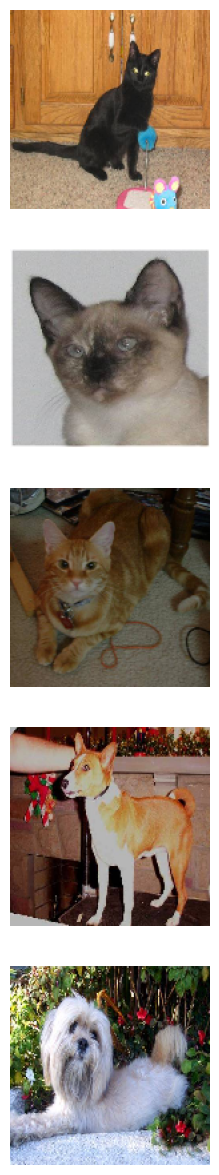

In [ ]:

# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
# 5
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
    rotation_range = 35,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range=0.1,
    horizontal_flip = True,
    preprocessing_function=lambda x: x[..., np.random.permutation([0, 1, 2])])


Found 2000 images belonging to 2 classes.


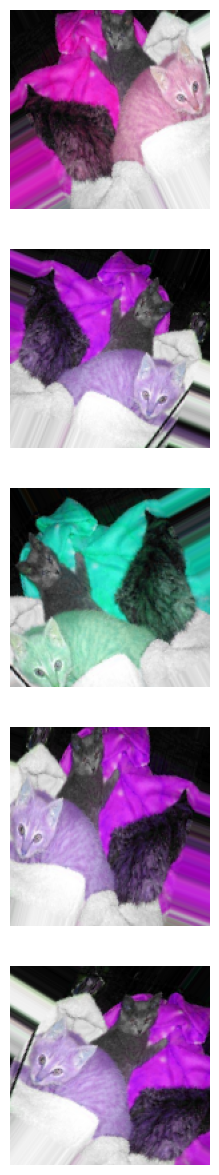

In [ ]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
# 7
input_shape = (150, 150, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                   

In [ ]:
# 8
checkpoint_filepath = 'cats_and_dogs/weights.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='accuracy',
    mode='max',
    save_best_only=True)

epochs = 25
history = model.fit_generator(train_data_gen, steps_per_epoch=2000 // batch_size, epochs=epochs, validation_data=val_data_gen, validation_steps=1000 // batch_size, callbacks=[model_checkpoint_callback])


<ipython-input-12-5f313aed9d55>:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data_gen, steps_per_epoch=2000 // batch_size, epochs=epochs, validation_data=val_data_gen, validation_steps=1000 // batch_size, callbacks=[model_checkpoint_callback])


Epoch 1/25
31/31 [==============================] - 102s 3s/step - loss: 0.7847 - accuracy: 0.5031 - val_loss: 0.6894 - val_accuracy: 0.6062


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/25
31/31 [==============================] - 99s 3s/step - loss: 0.6899 - accuracy: 0.5274 - val_loss: 0.6797 - val_accuracy: 0.5365
Epoch 3/25
31/31 [==============================] - 88s 3s/step - loss: 0.6980 - accuracy: 0.5470 - val_loss: 0.6705 - val_accuracy: 0.5854
Epoch 4/25
31/31 [==============================] - 89s 3s/step - loss: 0.6879 - accuracy: 0.5733 - val_loss: 0.6799 - val_accuracy: 0.5552
Epoch 5/25
31/31 [==============================] - 97s 3s/step - loss: 0.6845 - accuracy: 0.5816 - val_loss: 0.6507 - val_accuracy: 0.6500
Epoch 6/25
31/31 [==============================] - 99s 3s/step - loss: 0.6812 - accuracy: 0.5837 - val_loss: 0.6603 - val_accuracy: 0.6406
Epoch 7/25
31/31 [==============================] - 97s 3s/step - loss: 0.6759 - accuracy: 0.6028 - val_loss: 0.6477 - val_accuracy: 0.6479
Epoch 8/25
31/31 [==============================] - 89s 3s/step - loss: 0.6588 - accuracy: 0.6245 - val_loss: 0.6437 - val_accuracy: 0.6750
Epoch 9/25
31/31 [==

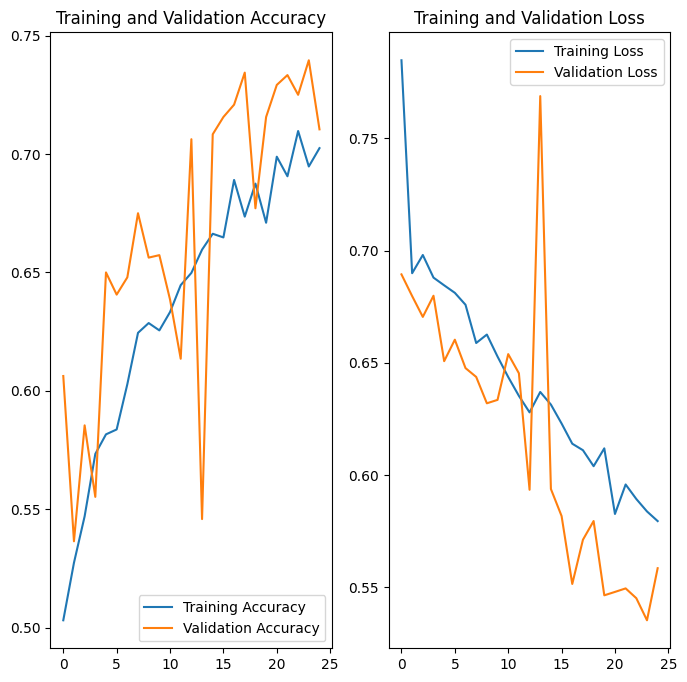

In [ ]:
# 9

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<ipython-input-14-c684ab44524b>:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_data_gen,steps = 3)


[77, 27, 15, 93, 20, 54, 60, 8, 80, 53, 52, 83, 41, 16, 74, 89, 94, 94, 76, 84, 12, 82, 64, 58, 89, 60, 71, 34, 33, 85, 43, 37, 91, 97, 46, 75, 95, 94, 38, 37, 20, 75, 95, 96, 73, 73, 45, 22]


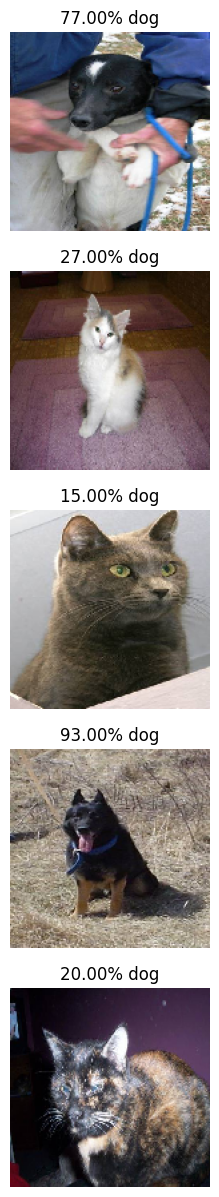

[1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0]


In [ ]:
def flatten_extend(matrix):
    flat_list = []
    for row in matrix:
        flat_list.extend(row)
    return flat_list

y_pred = model.predict_generator(test_data_gen,steps = 3)
y_pred_labels = np.argmax(y_pred, axis=1)
# print(y_pred_labels)

y_pred_flat = flatten_extend(y_pred)
y_pred_final =[]
for i in y_pred_flat:
    b = i*100
    b = int(b)
    y_pred_final.append(b)
print(y_pred_final)

sample_testing_images, _ = next(test_data_gen)
plotImages(sample_testing_images[:5], y_pred_final)

probabilities = []
for i in range(len(y_pred_final)-1):
    if y_pred_final[i] > 50:
      probabilities.append(1)
    else:
      probabilities.append(0)


print(probabilities)
# plotImages(test_data_gen, y_pred_final)


In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 68.0% of the images of cats and dogs.
You passed the challenge!
